# Project :California House Price Prediction
#We predict house price using regression algorithms

Regression Analysis
Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables. 

The Regression analysis is an important tool for modelling and analyzing data where  we fit a curve / line to the data points, in such a way that distance of each points from the predicted line/curve is minimized. 

Why do we use Regression Analysis?
As mentioned above,Regression analysis estimates the relationship between two or more variables. For example, we want to estimate growth in sales of a company based on current economic conditions based on the recent company data which indicates that the growth in sales is around two and a half times the growth in the economy. Using this insight, we can predict future sales of the company based on current & past information.

There are multiple benefits of using Regression analysis. They are as follows:

It indicates the significant relationships between dependent variable and independent variable.
It indicates the strength of impact of multiple independent variables on dependent variable.
Regression analysis also allows us to compare the effects of variables measured on different scales, such as the effect of price changes and the number of promotional activities. These benefits help Market Researchers / Data Analysts / Data Scientists to eliminate and evaluate the best set of variables to be used for building predictive models.

Linear Regression
It is one of the most widely known modeling technique. Linear regression is usually among the first few topics which people pick while learning predictive modeling. In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

It is represented by an equation Y=a+b*X + e, where a is intercept, b is slope of the line and e is error term. This equation can be used to predict the value of target variable based on given predictor variable(s).

In [ ]:
Project detil: There are 20640 observation and 10 variables. NOt all the variables are significant for the house price prediction. Therefore we are selecting only thres significant varaiables- 
    
    1. housing_median_age      
    2. total_rooms             
    3.median_income         
    as independent (X) variables and median_house_value as a target (Y) varables.

In [1]:
# I want import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# 1 . Import data 

In [2]:
# I wan timport huosing data from local folder
Housdata = pd.read_csv('housing.csv')

In [3]:
Housdata.head(2)# In order to predict the median house value, we have to select independent input (variables/attrubutes/features). These could be:
# medical_house_age 
# total_rooms
# medialn_income
#But for the exercitse purposes I am taking all the variable to see how the model is.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500


In [79]:
Housdata.shape

(20640, 10)

In [4]:
HData = Housdata.drop(['longitude','latitude','total_bedrooms','population','households','ocean_proximity'], axis = 1) # I want to check rows and cols

In [5]:
HData.describe() # I want to see summary statistics of the data,
# In general housing_median_age is found 29 years with a variability of 13 year,ranging from newly built house_median_age of 1 year ot max 52 years.
# On an average median_income is found as almost $4.00m with a variation of 2 units spreading from $0.5m to $15.00 m. Some house has exceptionally very high median income and hence outlier as they fall beyond 2 x std.
# There are 2636 rooms in a house in general some with only 2 rooms to 39320 rooms at most. Th variablity amoung the total_rooms is recoreded as 2182. This shows that there are some outlies as they are lying outsideo of 2 times std.
# There is very high gap between median_house_value ($15k to $500K) with a average value of $207k and variability of median_house_value is $116K. This shows that some median_house_value are lying as oytliers ad they are far from 2*std of 116.
# Also we can see from the count that there are some missing entries (NaN) for total_bedrooms(20433 entries out of 20640 observations)

,housing_median_age,total_rooms,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,3.870671,206855.816909
std,12.585558,2181.615252,1.899822,115395.615874
min,1.000000,2.000000,0.499900,14999.000000
25%,18.000000,1447.750000,2.563400,119600.000000
50%,29.000000,2127.000000,3.534800,179700.000000
75%,37.000000,3148.000000,4.743250,264725.000000
max,52.000000,39320.000000,15.000100,500001.000000


# Summary Statistics
In order to predict the median house value, we have to select independent input (variables/attrubutes/features). These are : median_house_age,  total_rooms and  median_income.
 In general housing_median_age is found 29 years with a variability of 13 year, ranging from newly built house_median_age of 1 year to max 52 years.  On an average median_income is found as almost $4.00m with a variation of 2 units spreading from $0.5m to $15.00 m. Some house has exceptionally very high median income and hence outlier as they fall beyond 2 x std.
There are 2636 rooms in a house in general some with only 2 rooms to 39320 rooms at most. The variablity among the total_rooms is recoreded as 2182. This shows that there are some outlies as they are lying outside of 2 times standard deviation. There is very high gap between median_house_value ($15k to $500K) with a average value of $207k and variability of median_house_value is $116K. This shows that some median_house_value are lying as oytliers ad they are far from 2*std of 116.


In [6]:
HData.dtypes

housing_median_age      int64
total_rooms             int64
median_income         float64
median_house_value      int64
dtype: object

# Exploratory Data Analysis

# # Handle missing values

In [7]:
HData.isnull().sum()

housing_median_age    0
total_rooms           0
median_income         0
median_house_value    0
dtype: int64

In [8]:
HData.info

<bound method DataFrame.info of        housing_median_age  total_rooms  median_income  median_house_value
0                      41          880         8.3252              452600
1                      21         7099         8.3014              358500
2                      52         1467         7.2574              352100
3                      52         1274         5.6431              341300
4                      52         1627         3.8462              342200
5                      52          919         4.0368              269700
6                      52         2535         3.6591              299200
7                      52         3104         3.1200              241400
8                      42         2555         2.0804              226700
9                      52         3549         3.6912              261100
10                     52         2202         3.2031              281500
11                     52         3503         3.2705              241800
12    

# Univariate and bivariate analysis

Our aim is to select input variable as far as independent among themselves. In this regard, we consider variables with 50% or lower correlation among themselves. medin_house_value is nearly highly correlated (0.69)with median_income,  housing_median_age(0.11) is next correlated inputs after total_rooms (0.13), however they are negatively correlated (-0.36) which is less than 50% and hecne I am taking both of them.
 

In [9]:
HData.corr() # I want to check corrolation between the independent and dependetn variables

,housing_median_age,total_rooms,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.198050,0.134153
median_income,-0.119034,0.198050,1.000000,0.688075
median_house_value,0.105623,0.134153,0.688075,1.000000


In [10]:
corr = HData.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)# precision(2) is set for 2 decimal palces. We can put as many decimal we want 

# medin_house_value is nearly highly correlated (0.69)with median_income. housing_median_age(0.11) is next correlated inputs after total_rooms (0.13), however they are negatively correlated (-0.36) which is less than 50% and hecne I am takin gboth of them. 

,housing_median_age,total_rooms,median_income,median_house_value
housing_median_age,1,-0.36,-0.12,0.11
total_rooms,-0.36,1,0.2,0.13
median_income,-0.12,0.2,1,0.69
median_house_value,0.11,0.13,0.69,1


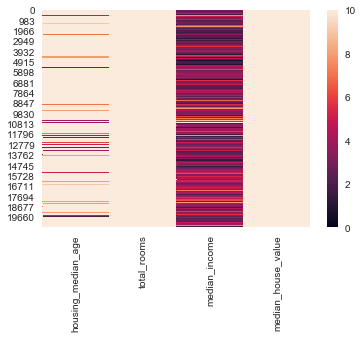

In [11]:
 ax = sns.heatmap(HData, vmin=0, vmax=10)

# 3. Split data 

In [12]:
X = HData[['housing_median_age','total_rooms','median_income']]
Y = HData['median_house_value']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [14]:
print(X_train.shape)
print(X_test.shape)

(16512, 3)
(4128, 3)


In [15]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(20640,)
(16512,)
(4128,)


In [ ]:
## Data Visualization

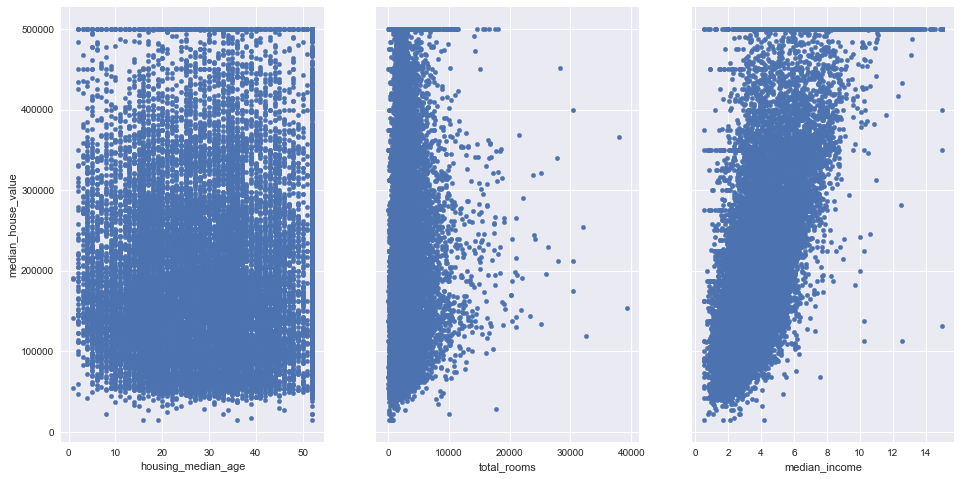

In [81]:
#visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
Housdata.plot(kind='scatter', x='housing_median_age', y='median_house_value', ax=axs[0], figsize=(16, 8))
Housdata.plot(kind='scatter', x='total_rooms', y='median_house_value', ax=axs[1])
Housdata.plot(kind='scatter', x='median_income', y='median_house_value', ax=axs[2])

In [ ]:
Questions About the Data
On the basis of this data, we want to tknow what will be the median_house _value in the future?

These general questions might lead you to more specific questions:

Is there a relationship between independent varaibles and  and target variables?
How strong is that relationship?
Which variables contribute to median_house_values?
What is the effect of each varaibles type on median_house_value?
Given the values in a particular independent variables, can median_house_value be predicted? From the graph above, median income is most influential variable.

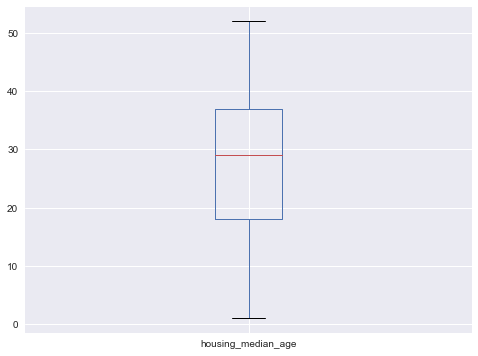

In [16]:
X_train.boxplot('housing_median_age', figsize=(8,6),grid=True) # House median_age is below 52 years and half of the data houses are below 30 years, some newly constructued houses. 

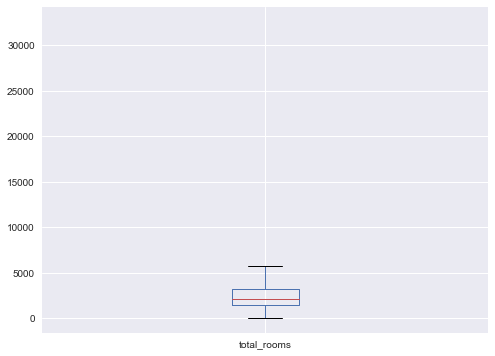

In [17]:
X_train.boxplot('total_rooms', figsize=(8,6),grid=True)

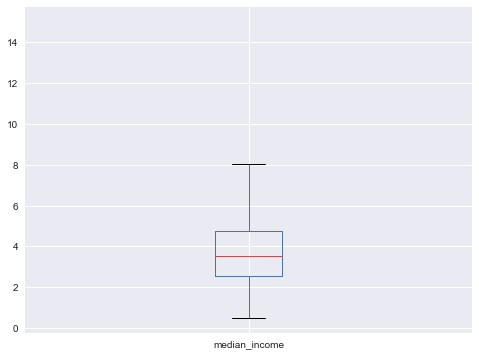

In [18]:
X_train.boxplot('median_income', figsize=(8,6),grid=True)

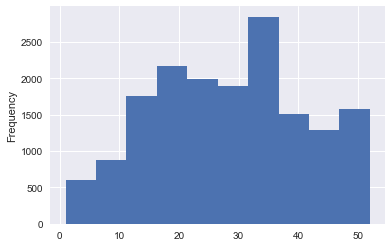

In [19]:
X_train['housing_median_age'].plot(kind='hist') # to some extent data looks in normal shape 

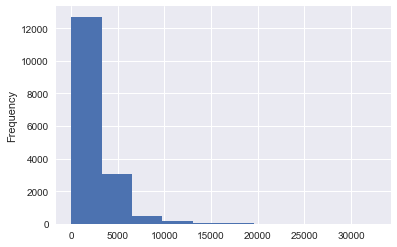

In [20]:
X_train['total_rooms'].plot(kind='hist') # data are heavily weighted to around zero or 5

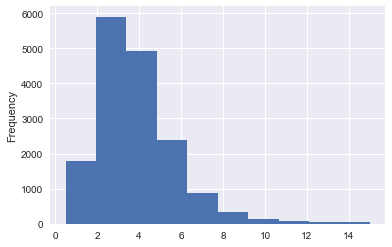

In [21]:
X_train['median_income'].plot(kind='hist') # Normally distributed toward median_income of 4 units

In [22]:
X_train.values


array([[6.0000e+00, 5.0200e+02, 4.2386e+00],
       [5.2000e+01, 2.3810e+03, 4.3898e+00],
       [2.6000e+01, 1.7180e+03, 3.9333e+00],
       ...,
       [3.1000e+01, 1.4310e+03, 3.1977e+00],
       [3.4000e+01, 2.1250e+03, 5.6315e+00],
       [1.5000e+01, 1.1710e+03, 1.3882e+00]])

In [23]:
X_train[X_train.isnull().any(axis=1)]

,housing_median_age,total_rooms,median_income


In [24]:
X_train.head()        

,housing_median_age,total_rooms,median_income
12069,6,502,4.2386
15925,52,2381,4.3898
11162,26,1718,3.9333
4904,38,697,1.4653
4683,52,2373,3.1765


In [25]:
X_train.tail()

,housing_median_age,total_rooms,median_income
13123,20,1314,4.4125
19648,27,1118,2.9135
9845,31,1431,3.1977
10799,34,2125,5.6315
2732,15,1171,1.3882


In [26]:
X_train.shape

(16512, 3)

In [27]:
X_train.describe() # it shows that no missing values, but Ocean_proximity is not displaced because .describe only takes account of numeral value and ocean_proximity is categorical 

,housing_median_age,total_rooms,median_income
count,16512.000000,16512.000000,16512.000000
mean,28.619065,2640.140322,3.876298
std,12.600999,2186.893548,1.906783
min,1.000000,2.000000,0.499900
25%,18.000000,1448.000000,2.566625
50%,29.000000,2127.000000,3.548500
75%,37.000000,3149.000000,4.747575
max,52.000000,32627.000000,15.000100


# 5. Standardise data 
# Note that once the data are normalized or scaled, then we cannot make a summary statistics and hence we need to assign different name to scaled data (train_std or test_std or similar)

In [28]:
from sklearn.preprocessing import StandardScaler # Since data are not of similar scale, scaling is needed for the whole set 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)


In [29]:
X_train_std # I want to see all transformed data and now we can see that the data has been transformed.

array([[-1.79507596, -0.97773624,  0.19001247],
       [ 1.85553889, -0.11850059,  0.26931072],
       [-0.20785212, -0.42167953,  0.02989505],
       ...,
       [ 0.18895385, -0.55291989, -0.35589721],
       [ 0.42703742, -0.23556516,  0.92053182],
       [-1.08082523, -0.67181359, -1.30490629]])

In [30]:
X_test_std

array([[-5.36694534e-01, -2.39437828e-01,  1.62239101e-01],
       [ 2.61818725e-01,  8.08171703e-04,  1.03200015e+00],
       [ 2.22647471e-02,  2.54015420e-01,  2.67446099e-01],
       ...,
       [-1.41505912e+00, -4.15803388e-01, -3.44881069e-01],
       [-8.56099838e-01,  5.58934780e-02,  1.22649150e+00],
       [ 1.85884524e+00, -4.80609631e-01, -2.75473304e-01]])

# 6. Perform Linear regression

In [ ]:
Simple Linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

y=β0+β1x 
What does each term represent?

.y  is the response
.x  is the feature
.β0  is the intercept
.β1  is the coefficient for x
Together,  β0  and  β1  are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

In [ ]:
Estimating ("Learning") Model Coefficients
Generally speaking, coefficients are estimated using the least squares criterion, which means we find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):


# Introduction to Scikit Learn

Since its release in 2007, scikit-learn has become one of the most popular open source Machine Learning libraries for Python. scikit-learn provides algorithms for Machine Learning tasks including classification, regression, dimensionality reduction, and clustering. It also provides modules for extracting features, processing data, and evaluating models.

Conceived as an extension to the SciPy library, scikit-learn is built on the popular Python libraries NumPy and matplotlib. NumPy extends Python to support efficient operations on large arrays and multidimensional matrices. matplotlib provides visualization tools, and SciPy provides modules for scientific computing.

scikit-learn is popular for academic research because it has a well-documented, easy-to-use, and versatile API. Developers can use scikit-learn to experiment with different algorithms by changing only a few lines of the code. scikit-learn wraps some popular implementations of machine learning algorithms, such as LIBSVM and LIBLINEAR. Other Python libraries, including NLTK, include wrappers for scikit-learn. scikit-learn also includes a variety of datasets, allowing developers to focus on algorithms rather than obtaining and cleaning data.

Licensed under the permissive BSD license, scikit-learn can be used in commercial applications without restrictions. Many of scikit-learn's algorithms are fast and scalable to all but massive datasets. Finally, scikit-learn is noted for its reliability; much of the library is covered by automated tests.

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_std,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model design
In order to predict the median_house_value we have used Linear Regression, decision tree regression and Random Forest Regression. For them to train the algorithms, we split the data into 80 – 20 ratio. We built the model in training set and test it on the test set of the data split.


In [32]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train_std)
est = sm.OLS(Y_train,X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5952.
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:30:18   Log-Likelihood:            -2.0988e+05
No. Observations:               16512   AIC:                         4.198e+05
Df Residuals:                   16508   BIC:                         4.198e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.072e+05    624.065    332.097      0.0

In [33]:
import statsmodels.api as sm # getting summary of the model on the Test set 
X2 = sm.add_constant(X_test_std)
est = sm.OLS(Y_test,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1318.
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:30:18   Log-Likelihood:                -52543.
No. Observations:                4128   AIC:                         1.051e+05
Df Residuals:                    4124   BIC:                         1.051e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.053e+05   1270.533    161.570      0.0

# Interpreting Model Coefficients
How do we interpret the coefficient ( β1 )?

A "unit" increase in husing_median_age is associated with a $25,060 increase in median_house_value.
An increase in a number of rooms is associated with an increases in median_house_value by $8934.00

In [34]:
#Defined y_predict
Y_prediction = model.predict(X_test_std)

In [35]:
Y_prediction

array([205139.97736843, 297711.32959349, 231685.59912568, ...,
       140627.25614824, 286277.37130278, 226907.44607977])

In [36]:
Y_prediction.mean()

207249.8958938954

In [37]:
#Checking the score for train data
model.score(X_train_std,Y_train)

0.5196284575917456

In [38]:
#Checking the score for test data
model.score(X_test_std,Y_test)

0.48826521027801706

In [39]:
#Predicting the model
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_test,Y_prediction)))

81687.15246248955


# 7. Perform Decision Tree regression

In [40]:
X_DT = HData[['housing_median_age','total_rooms','median_income']]
Y = Housdata['median_house_value']


In [41]:
from sklearn.cross_validation import train_test_split
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_DT,Y, test_size=.2,random_state=0)

C:\Users\Indu Shahi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
X_train2.head()

,housing_median_age,total_rooms,median_income
12069,6,502,4.2386
15925,52,2381,4.3898
11162,26,1718,3.9333
4904,38,697,1.4653
4683,52,2373,3.1765


Since we are doing DT regression we need to clean data and scaling too, for this we need to remove NaN, get dummies and scaling for both test and train


In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std2 = ss.fit_transform(X_train2)
X_test_std2 = ss.fit_transform(X_test2)

In [44]:
#Creating model for DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model2= DecisionTreeRegressor(random_state = 0)
model2.fit(X_train_std2,Y_train2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [45]:
import statsmodels.api as sm
X3 = sm.add_constant(X_train_std2)
est = sm.OLS(Y_train2,X3)
est3 = est.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5952.
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:30:24   Log-Likelihood:            -2.0988e+05
No. Observations:               16512   AIC:                         4.198e+05
Df Residuals:                   16508   BIC:                         4.198e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.072e+05    624.065    332.097      0.0

In [46]:
import statsmodels.api as sm # Getting summary on test set o rmodel on the test set
X3 = sm.add_constant(X_test_std2)
est = sm.OLS(Y_test2,X3)
est3 = est.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1318.
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:30:25   Log-Likelihood:                -52543.
No. Observations:                4128   AIC:                         1.051e+05
Df Residuals:                    4124   BIC:                         1.051e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.053e+05   1270.533    161.570      0.0

In [47]:
model2.score(X_train_std2,Y_train2)

1.0

In [48]:
model2.score(X_test_std2,Y_test2)

0.10437515502945538

In [49]:
Y_pred2 = model2.predict(X_test_std2)

In [50]:
Y_pred2.mean()

208610.48934108528

In [51]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_test2,Y_pred2)))

108067.31269140793


# 8.Perform Random Forest regression 

Since we are doing RF regression we need to clean data and scaling too, for this we need to remove NaN, get dummies and scaling for both test and train

In [52]:
X_RF = HData[['housing_median_age','total_rooms','median_income']]
Y = Housdata['median_house_value']

In [53]:
X_RF.head(2)

,housing_median_age,total_rooms,median_income
0,41,880,8.3252
1,21,7099,8.3014


In [54]:
from sklearn.cross_validation import train_test_split
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(X_RF,
                                                 Y,
                                                 test_size=.2, random_state=0)

In [55]:
X_test3.head()
X_train3.head()

,housing_median_age,total_rooms,median_income
12069,6,502,4.2386
15925,52,2381,4.3898
11162,26,1718,3.9333
4904,38,697,1.4653
4683,52,2373,3.1765


In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std3 = ss.fit_transform(X_train3)
X_test_std3 = ss.fit_transform(X_test3)

In [57]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train_std3,Y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
model3.score(X_train_std3,Y_train3)

0.9100590879400887

In [59]:
model3.score(X_test_std3,Y_test3)

0.45780803368299033

In [60]:
Y_pred3 = model3.predict(X_test_std3)

In [61]:
Y_pred3

array([203130. , 329750. , 238760. , ..., 163240. , 423190.5, 240890.1])

In [62]:
Y_pred3.mean()

210372.49903100776

In [63]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_test3,Y_pred3)))

84082.92766517786


In [64]:
import statsmodels.api as sm
X4 = sm.add_constant(X_train_std3)
est = sm.OLS(Y_train3,X4)
est4 = est.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5952.
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:30:38   Log-Likelihood:            -2.0988e+05
No. Observations:               16512   AIC:                         4.198e+05
Df Residuals:                   16508   BIC:                         4.198e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.072e+05    624.065    332.097      0.0

In [65]:
import statsmodels.api as sm
X4 = sm.add_constant(X_test_std3)
est = sm.OLS(Y_test3,X4)
est4 = est.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1318.
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:30:38   Log-Likelihood:                -52543.
No. Observations:                4128   AIC:                         1.051e+05
Df Residuals:                    4124   BIC:                         1.051e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.053e+05   1270.533    161.570      0.0

In [ ]:
Combined table of all the above algorithms.

 	Name of Algorithms	 
 	OLS regression 12 features including 4 dummies 	DT Regression on 12 features 	RF Regression on 12 features	Regression on single var
R-squared 	0.647	0.647	0.647	0.48
Adj R-Squared 	0.647	0.647	0.647	0.48
F -stsisctics 	2522	2522	5952	1.5^04
Prob(F)	0	0	0	 
AIC	4.147e^05	4.147e^05	4.147e^05	4.2^05
BIC	4.148e^05	4.148e^05	4.148e^05	4.2^06
Y_pred.mean()	207k	208k	207k	206k
RMSE	69k	78	60k	85k
R2 on test set	0.637	0.639	0.639	 


# Conclusion and Recomendation 

# 9.  Bonus exercise: Perform Linear Regression with one independent variable 

In [66]:
#Perform Regression with one Independent Variable
#We select Median income since it has higher correlation
X_SLR = HData.median_income.values
X_SLR = X_SLR.reshape(-1,1)

In [67]:
from sklearn.cross_validation import train_test_split
X_train4,X_test4,Y_train4,Y_test4 = train_test_split(X_SLR,
                                                 Y,
                                                 test_size=.2, random_state=0)

In [68]:
from sklearn.linear_model import LinearRegression # fitting model on the training set 
model_SLR = LinearRegression()
model_SLR.fit(X_train4,Y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
model_SLR.score(X_train4,Y_train4)# R-squared value on the train set

0.479914127199415

In [70]:
model_SLR.score(X_test4,Y_test4)# R-squared value on the test set

0.4466846804895944

In [71]:
Y_pred4 = model_SLR.predict(X_test4)

In [72]:
Y_pred4.mean()

206067.24960430694

In [73]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_test4,Y_pred4)))

84941.05152406936


# Plotting the Least Squares Line
Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:


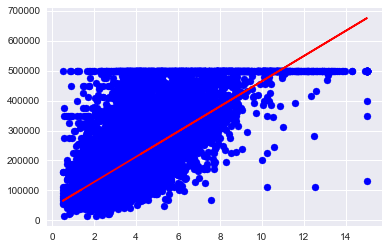

In [74]:
#Ploting on Training Set
plt.scatter(X_train4,Y_train4,color='b')
plt.plot(X_train4,model_SLR.predict(X_train4), color='r')

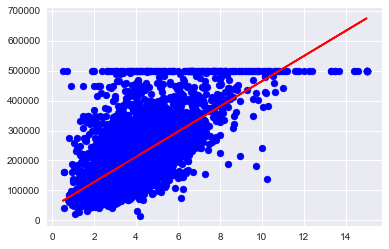

In [75]:
#Ploting on Testing Set
plt.scatter(X_test4,Y_test4,color='b')
plt.plot(X_test4,model_SLR.predict(X_test4), color='r')

In [76]:
import statsmodels.api as sm # Getting summary on the training set  Since th emodel is built on single features there is no difference between the R**2 and Adj R**2
X2 = sm.add_constant(X_train4)
est = sm.OLS(Y_train4,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 1.523e+04
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:30:49   Log-Likelihood:            -2.1054e+05
No. Observations:               16512   AIC:                         4.211e+05
Df Residuals:                   16510   BIC:                         4.211e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.432e+04   1471.076     30.128      0.0

In [77]:
import statsmodels.api as sm # Getting summary on the test set  Since the model is built on single features there is no difference between the R**2 and Adj R**2
X2 = sm.add_constant(X_test4)# Also score is less than that of training set. It is because model is under fit on the training set and hence it is less the test set  i.e 
est = sm.OLS(Y_test4,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     3337.
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:30:50   Log-Likelihood:                -52707.
No. Observations:                4128   AIC:                         1.054e+05
Df Residuals:                    4126   BIC:                         1.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.828e+04   3022.244     15.974      0.0

# Plotting the Least Squares Line with different way 
Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:


In [86]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'median_income': [Housdata.median_income.min(), Housdata.median_income.max()]})
X_new.head()

,median_income
0,0.4999
1,15.0001


In [90]:
# make predictions for those x values and store them
preds = model_SLR.predict(X_new)
preds

array([ 65332.52085936, 674807.50392953])

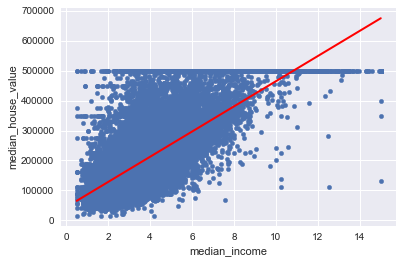

In [89]:
# first, plot the observed data
Housdata.plot(kind='scatter', x='median_income', y='median_house_value')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)